In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
%matplotlib inline

In [68]:
!pip install tensorflow

In [8]:
# CSV containing image name and category
data_df = pd.read_csv('C:/Users/ali/Desktop/covid deep/archive/Chest_xray_Corona_Metadata.csv') 
df_summary = pd.read_csv('C:/Users/ali/Desktop/covid deep/archive/Chest_xray_Corona_dataset_Summary.csv') # CSV containing info about dataset

In [ ]:
# CSV containing image name and category
data_df = pd.read_csv('D:/Chest_xray_Corona_Metadata.csv') 
df_summary = pd.read_csv('D:/Chest_xray_Corona_dataset_Summary.csv') # CSV containing info about dataset

In [3]:
test_dir ='C:/Users/ali/Desktop/covid deep/archive/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test'
train_dir = 'C:/Users/ali/Desktop/covid deep/archive/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train'


In [4]:
train_data = data_df[data_df['Dataset_type'] == 'TRAIN']
test_data = data_df[data_df['Dataset_type'] == 'TEST']

In [6]:
data_df.head(20)


,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN
5,5,IM-0117-0001.jpeg,Normal,TRAIN,NaN,NaN
6,6,IM-0115-0001.jpeg,Normal,TRAIN,NaN,NaN
7,7,IM-0189-0001.jpeg,Normal,TRAIN,NaN,NaN
8,8,IM-0187-0001.jpeg,Normal,TRAIN,NaN,NaN
9,9,IM-0185-0001.jpeg,Normal,TRAIN,NaN,NaN


In [9]:
df_summary.head()


,Unnamed: 0,Label,Label_1_Virus_category,Label_2_Virus_category,Image_Count
0,0,Normal,NaN,NaN,1576
1,1,Pnemonia,Stress-Smoking,ARDS,2
2,2,Pnemonia,Virus,NaN,1493
3,3,Pnemonia,Virus,COVID-19,58
4,4,Pnemonia,Virus,SARS,4


In [17]:
data_df.describe()

,Unnamed: 0
count,5910.000000
mean,2957.075635
std,1710.186149
min,0.000000
25%,1477.250000
50%,2954.500000
75%,4431.750000
max,5932.000000


In [18]:
df_summary.describe()

,Unnamed: 0,Image_Count
count,7.000000,7.000000
mean,3.000000,844.285714
std,2.160247,1111.342239
min,0.000000,2.000000
25%,1.500000,4.500000
50%,3.000000,58.000000
75%,4.500000,1534.500000
max,6.000000,2772.000000


In [19]:
data_df.shape

(5910, 6)

In [20]:
df_summary.shape

(7, 5)

In [21]:
data_df.dtypes

Unnamed: 0                 int64
X_ray_image_name          object
Label                     object
Dataset_type              object
Label_2_Virus_category    object
Label_1_Virus_category    object
dtype: object

In [22]:
df_summary.dtypes

Unnamed: 0                 int64
Label                     object
Label_1_Virus_category    object
Label_2_Virus_category    object
Image_Count                int64
dtype: object

In [23]:
data_df.Label_2_Virus_category.value_counts()

COVID-19         58
Streptococcus     5
SARS              4
ARDS              2
Name: Label_2_Virus_category, dtype: int64

In [16]:
data_df.Label_1_Virus_category.value_counts()

bacteria          2777
Virus             1555
Stress-Smoking       2
Name: Label_1_Virus_category, dtype: int64

In [82]:
# Storing TRAIN and TEST data into seperate dataframes
#train_data = df[df['Dataset_type'] == 'TRAIN']
#test_data = df[df['Dataset_type'] == 'TEST']

In [83]:
#train_data.head()

In [84]:
#test_data.head()

In [85]:
# Filling NaN values with 'missing'
#train = train_data.fillna('missing')
#test = test_data.fillna('missing')

In [24]:
train_data.head()


,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN


In [25]:
train_data.isna().sum()


Unnamed: 0                   0
X_ray_image_name             0
Label                        0
Dataset_type                 0
Label_2_Virus_category    5217
Label_1_Virus_category    1342
dtype: int64

In [26]:
train_data['Label_1_Virus_category'].value_counts()


bacteria          2535
Virus             1407
Stress-Smoking       2
Name: Label_1_Virus_category, dtype: int64

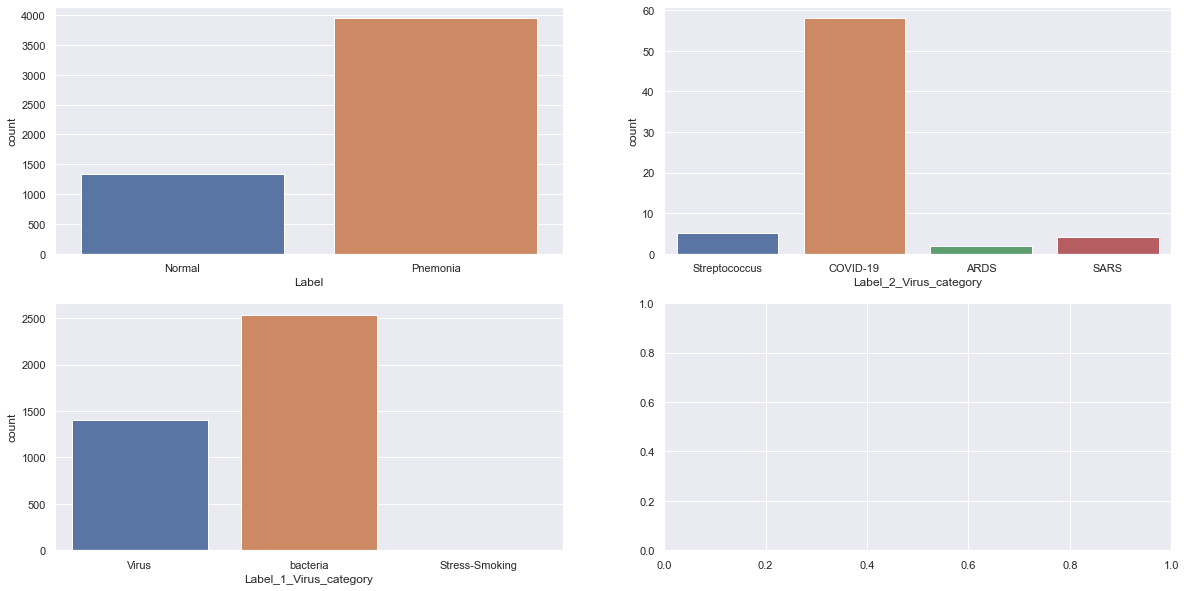

In [28]:
import seaborn as sns
sns.set()
targets = ['Label', 'Label_2_Virus_category', 'Label_1_Virus_category']
fig,ax=plt.subplots(2,2, figsize=(20, 10))
sns.countplot(x=targets[0],data=train_data, ax=ax[0, 0])
sns.countplot(x=targets[1],data=train_data, ax=ax[0, 1])
sns.countplot(x=targets[2],data=train_data, ax=ax[1, 0])
plt.show()

In [30]:
test_data=data_df[data_df['Dataset_type']=='TEST']


In [31]:
test_data.shape

(624, 6)

In [32]:
test_data.isna().sum()


Unnamed: 0                  0
X_ray_image_name            0
Label                       0
Dataset_type                0
Label_2_Virus_category    624
Label_1_Virus_category    234
dtype: int64

In [33]:
test_data['Label_1_Virus_category'].value_counts()


bacteria    242
Virus       148
Name: Label_1_Virus_category, dtype: int64

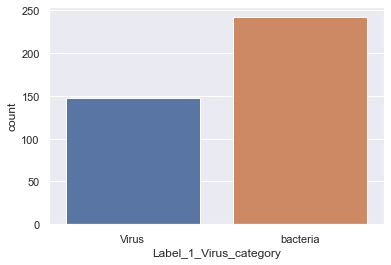

In [34]:
targets = ['Label_1_Virus_category']
sns.countplot(x=targets[0],data=test_data)
plt.show()



#targets = ['Label', 'Label_2_Virus_category', 'Label_1_Virus_category']
#fig,ax=plt.subplots(2,2, figsize=(20, 10))
#sns.countplot(x=targets[0],data=test_data, ax=ax[0, 0])
#sns.countplot(x=targets[1],data=test_data, ax=ax[0, 1])
#sns.countplot(x=targets[2],data=test_data, ax=ax[1, 0])
#plt.show()

In [35]:
data_df.isna().sum()


Unnamed: 0                   0
X_ray_image_name             0
Label                        0
Dataset_type                 0
Label_2_Virus_category    5841
Label_1_Virus_category    1576
dtype: int64

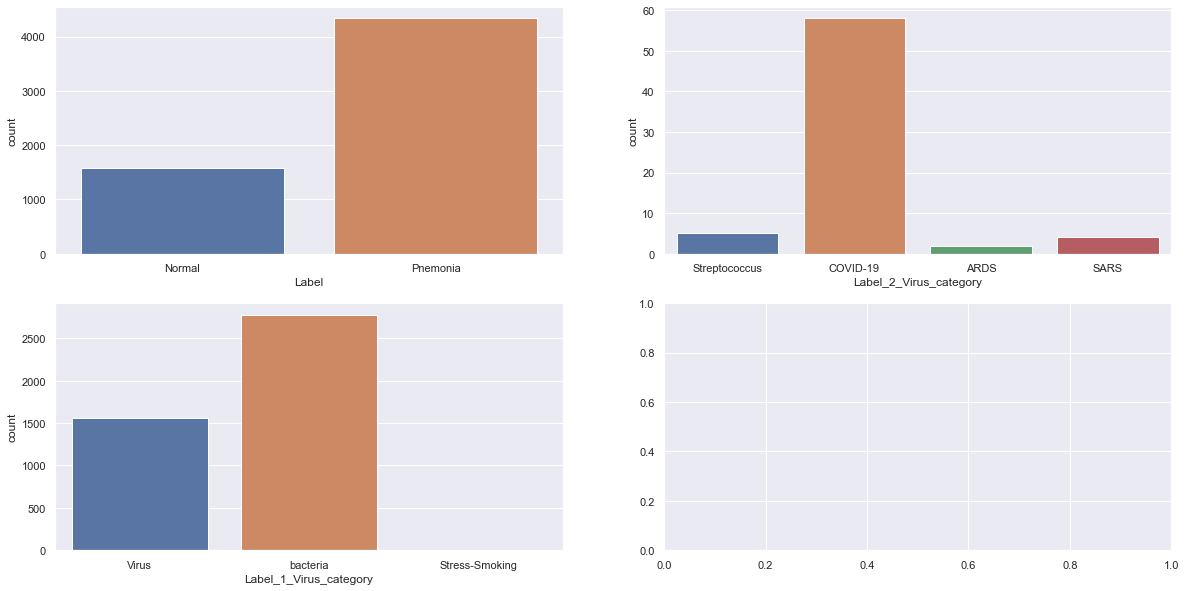

In [37]:
targets = ['Label', 'Label_2_Virus_category', 'Label_1_Virus_category']
fig,ax=plt.subplots(2,2, figsize=(20, 10))
sns.countplot(x=targets[0],data=data_df, ax=ax[0, 0])
sns.countplot(x=targets[1],data=data_df, ax=ax[0, 1])
sns.countplot(x=targets[2],data=data_df, ax=ax[1, 0])
plt.show()

In [38]:
train_data.fillna('NA', inplace = True)
train_data['Label'] = train_data['Label']+"/"+train_data['Label_2_Virus_category']

In [39]:
train_dff = train_data[(train_data['Label'] =='Pnemonia/COVID-19') | (train_data['Label'] == 'Normal/NA') \
                       | (train_data['Label'] == 'Pnemonia/NA')]
train_dff = train_dff.sample(frac = 1)
print(len(train_dff))

5275


In [40]:
test_data.fillna('NA', inplace = True)
test_data['Label'] = test_data['Label']+"/"+test_data['Label_2_Virus_category']
test_df = test_data[(test_data['Label'] =='Pnemonia/COVID-19') | (test_data['Label'] == 'Normal/NA') \
                       | (test_data['Label'] == 'Pnemonia/NA')]

test_df = test_df.sample(frac = 1)
print(len(test_df))

624


C:\Users\ali\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:5171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_6284/2294837288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Label'] = test_data['Label']+"/"+test_data['Label_2_Virus_category']


In [41]:
test_df[test_df['Label']=='Normal/NA'].head(2)

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
5445,5468,NORMAL2-IM-0219-0001.jpeg,Normal/NA,TEST,NA,NA
5313,5336,NORMAL2-IM-0033-0001.jpeg,Normal/NA,TEST,NA,NA


In [42]:
test_df[test_df['Label']=='Pnemonia/NA'].head(2)

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
5619,5642,person132_bacteria_632.jpeg,Pnemonia/NA,TEST,NA,bacteria
5858,5881,person173_bacteria_831.jpeg,Pnemonia/NA,TEST,NA,bacteria


In [43]:
test_df[test_df['Label']=='Pnemonia/COVID-19']

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category


In [44]:
test_df_covid = train_dff[-600:]
train_dff = train_dff[:-600]
print(len(test_df_covid))
print(len(train_dff))

600
4675


In [45]:
test_df_covid[test_df_covid['Label']=='Pnemonia/COVID-19']

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
5269,5286,2C10A413-AABE-4807-8CCE-6A2025594067.jpeg,Pnemonia/COVID-19,TRAIN,COVID-19,Virus
5238,5248,F63AB6CE-1968-4154-A70F-913AF154F53D.jpeg,Pnemonia/COVID-19,TRAIN,COVID-19,Virus
5228,5237,gr1_lrg-b.jpg,Pnemonia/COVID-19,TRAIN,COVID-19,Virus
5248,5260,8FDE8DBA-CFBD-4B4C-B1A4-6F36A93B7E87.jpeg,Pnemonia/COVID-19,TRAIN,COVID-19,Virus
5270,5287,23E99E2E-447C-46E5-8EB2-D35D12473C39.png,Pnemonia/COVID-19,TRAIN,COVID-19,Virus


In [46]:
image_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.15,
    height_shift_range=0.15,
    brightness_range=None,
    zoom_range=0.10,
    channel_shift_range=0.0,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=True,
    rescale=1./255,
    preprocessing_function=None,
    validation_split=0.2,
    dtype=None,
)

In [47]:
train_datagen = image_gen.flow_from_dataframe(
    dataframe=train_dff,
    directory=train_dir,
    x_col="X_ray_image_name",
    y_col="Label",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    seed=25,
    shuffle=True,
    subset='training'
)

valid_datagen = image_gen.flow_from_dataframe(
    dataframe=train_dff,
    directory=train_dir,
    x_col="X_ray_image_name",
    y_col="Label",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    seed=25,
    shuffle=True,
    subset='validation'
)

Found 3740 validated image filenames belonging to 3 classes.
Found 935 validated image filenames belonging to 3 classes.


In [48]:
test_datagen_covid = image_gen.flow_from_dataframe(
    dataframe=test_df_covid,
    directory=train_dir,
    x_col="X_ray_image_name",
    y_col="Label",
    classes = ['Normal/NA','Pnemonia/COVID-19','Pnemonia/NA'],
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    seed=25,
    shuffle=True
)

Found 600 validated image filenames belonging to 3 classes.


In [49]:
test_datagen = image_gen.flow_from_dataframe(
    dataframe=test_df,
    directory=test_dir,
    x_col="X_ray_image_name",
    y_col="Label",
    classes = ['Normal/NA','Pnemonia/COVID-19','Pnemonia/NA'],
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    seed=25,
    shuffle=True
)

Found 624 validated image filenames belonging to 3 classes.


In [50]:
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=[256,256,3]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(3, activation='softmax'))
 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 activation (Activation)     (None, 256, 256, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 256, 256, 32)      0         
                                                                 
 batch_normalization_1 (Batc  (None, 256, 256, 32)     128       
 hNormalization)                                        

In [99]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0004)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [100]:
history = model.fit(train_datagen, steps_per_epoch = 3740/32, epochs =40,validation_data = valid_datagen, validation_steps = 935/32)

Epoch 1/40
116/116 [==============================] - 1910s 16s/step - loss: 1.6494 - accuracy: 0.8537 - val_loss: 11.1641 - val_accuracy: 0.0096
Epoch 2/40
116/116 [==============================] - 1727s 15s/step - loss: 0.9861 - accuracy: 0.8877 - val_loss: 4.8458 - val_accuracy: 0.6321
Epoch 3/40
116/116 [==============================] - 34527s 298s/step - loss: 0.9085 - accuracy: 0.8930 - val_loss: 5.7204 - val_accuracy: 0.7176
Epoch 4/40
116/116 [==============================] - 1781s 15s/step - loss: 0.8116 - accuracy: 0.9083 - val_loss: 5.7151 - val_accuracy: 0.7294
Epoch 5/40
116/116 [==============================] - 1757s 15s/step - loss: 0.9080 - accuracy: 0.9070 - val_loss: 2.3645 - val_accuracy: 0.7519
Epoch 6/40
116/116 [==============================] - 2108s 18s/step - loss: 0.9332 - accuracy: 0.9070 - val_loss: 1.8516 - val_accuracy: 0.7786
Epoch 7/40
116/116 [==============================] - 1744s 15s/step - loss: 0.6995 - accuracy: 0.9222 - val_loss: 5.0849 - val

In [101]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0002)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_datagen, steps_per_epoch = 3740/32, epochs =2,validation_data = valid_datagen, validation_steps = 935/32)

Epoch 1/2
116/116 [==============================] - 1938s 17s/step - loss: 0.2789 - accuracy: 0.9508 - val_loss: 0.2976 - val_accuracy: 0.9305
Epoch 2/2
116/116 [==============================] - 1775s 15s/step - loss: 0.2589 - accuracy: 0.9471 - val_loss: 0.3235 - val_accuracy: 0.9176


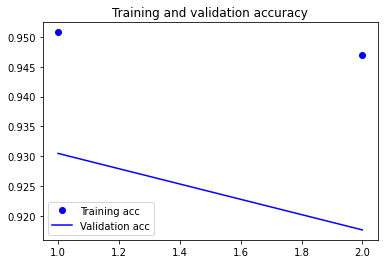

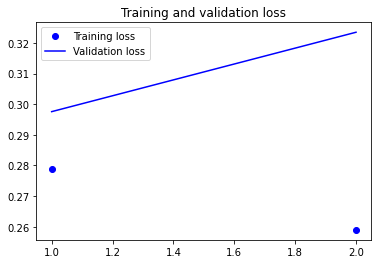

In [102]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

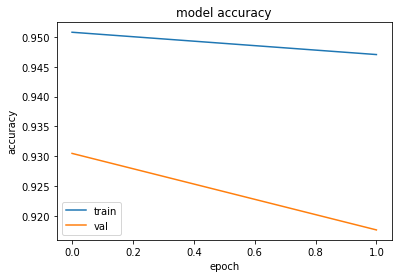

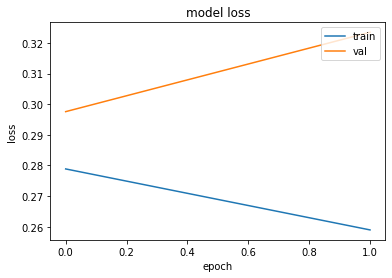

In [104]:
# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [19]:
train_data.fillna('NA', inplace = True)
train_data['Label'] = train_data['Label']+"/"+train_data['Label_2_Virus_category']

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,missing,missing
1,1,IM-0127-0001.jpeg,Normal,TRAIN,missing,missing
2,2,IM-0125-0001.jpeg,Normal,TRAIN,missing,missing
3,3,IM-0122-0001.jpeg,Normal,TRAIN,missing,missing
4,4,IM-0119-0001.jpeg,Normal,TRAIN,missing,missing


In [20]:
test.head()

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
5286,5309,IM-0021-0001.jpeg,Normal,TEST,missing,missing
5287,5310,IM-0019-0001.jpeg,Normal,TEST,missing,missing
5288,5311,IM-0017-0001.jpeg,Normal,TEST,missing,missing
5289,5312,IM-0016-0001.jpeg,Normal,TEST,missing,missing
5290,5313,IM-0015-0001.jpeg,Normal,TEST,missing,missing


In [105]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0002)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model.fit(train_datagen, steps_per_epoch = 3740/32, epochs =5,validation_data = valid_datagen, validation_steps = 935/32)

Epoch 1/5
116/116 [==============================] - 1943s 17s/step - loss: 0.3805 - accuracy: 0.9487 - val_loss: 1.8402 - val_accuracy: 0.7422
Epoch 2/5
116/116 [==============================] - 1936s 17s/step - loss: 0.4606 - accuracy: 0.9449 - val_loss: 0.3515 - val_accuracy: 0.9422
Epoch 3/5
116/116 [==============================] - 2001s 17s/step - loss: 0.3840 - accuracy: 0.9540 - val_loss: 2.5833 - val_accuracy: 0.6610
Epoch 4/5
116/116 [==============================] - 1912s 16s/step - loss: 0.2897 - accuracy: 0.9567 - val_loss: 1.3925 - val_accuracy: 0.7989
Epoch 5/5
116/116 [==============================] - 1875s 16s/step - loss: 0.3202 - accuracy: 0.9535 - val_loss: 0.7461 - val_accuracy: 0.8289


In [ ]:
plt.figure(figsize=(10,10))
df_meta[df_meta["Dataset_type"]=="TRAIN"]["Label"].value_counts().plot.bar(rot=0)
plt.tick_params(labelsize=25)

In [52]:
# Creating a callback which stops the training when the val_accuracy reaches below 0.2 to prevent overfitting
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_loss') < 0.2):
      print("\n Reached val_loss < 0.2")
      self.model.stop_training = True

In [107]:
Callback =  myCallback()


opt = tf.keras.optimizers.Adam(learning_rate=0.0002)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model.fit(train_datagen, steps_per_epoch = 3740/32, epochs =20,validation_data = valid_datagen, validation_steps = 935/32, callbacks = Callback
)

Epoch 1/20
116/116 [==============================] - 3081s 26s/step - loss: 0.2113 - accuracy: 0.9575 - val_loss: 0.3573 - val_accuracy: 0.9241
Epoch 2/20
116/116 [==============================] - 21012s 181s/step - loss: 0.1817 - accuracy: 0.9575 - val_loss: 0.3754 - val_accuracy: 0.8995
Epoch 3/20
116/116 [==============================] - 2690s 23s/step - loss: 0.2964 - accuracy: 0.9561 - val_loss: 2.4653 - val_accuracy: 0.7016
Epoch 4/20
116/116 [==============================] - 2170s 19s/step - loss: 0.1980 - accuracy: 0.9607 - val_loss: 0.3646 - val_accuracy: 0.8984
Epoch 5/20
116/116 [==============================] - 1974s 17s/step - loss: 0.2374 - accuracy: 0.9586 - val_loss: 0.2940 - val_accuracy: 0.9251
Epoch 6/20
116/116 [==============================] - 3887s 33s/step - loss: 0.2979 - accuracy: 0.9476 - val_loss: 0.5684 - val_accuracy: 0.8877
Epoch 7/20
116/116 [==============================] - 1920s 16s/step - loss: 0.3200 - accuracy: 0.9570 - val_loss: 0.4967 - val_

In [108]:
Callback =  myCallback()


opt = tf.keras.optimizers.Adam(learning_rate=0.0003)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model.fit(train_datagen, steps_per_epoch = 3740/32, epochs =20,validation_data = valid_datagen, validation_steps = 935/32, callbacks = Callback
)

Epoch 1/20
116/116 [==============================] - 1993s 17s/step - loss: 0.2607 - accuracy: 0.9508 - val_loss: 1.2133 - val_accuracy: 0.7102
Epoch 2/20
116/116 [==============================] - 1913s 16s/step - loss: 0.2220 - accuracy: 0.9583 - val_loss: 0.2685 - val_accuracy: 0.9198
Epoch 3/20
116/116 [==============================] - 1886s 16s/step - loss: 0.3273 - accuracy: 0.9575 - val_loss: 0.7405 - val_accuracy: 0.7668
Epoch 4/20
116/116 [==============================] - 16743s 144s/step - loss: 0.2239 - accuracy: 0.9519 - val_loss: 7.6101 - val_accuracy: 0.5176
Epoch 5/20
116/116 [==============================] - 1749s 15s/step - loss: 0.2832 - accuracy: 0.9516 - val_loss: 0.8219 - val_accuracy: 0.8364
Epoch 6/20
116/116 [==============================] - 1790s 15s/step - loss: 0.2721 - accuracy: 0.9561 - val_loss: 0.7928 - val_accuracy: 0.7701
Epoch 7/20
116/116 [==============================] - 1889s 16s/step - loss: 0.2201 - accuracy: 0.9620 - val_loss: 2.3556 - val_

In [53]:
Callback =  myCallback()


opt = tf.keras.optimizers.Adam(learning_rate=0.0004)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model.fit(train_datagen, steps_per_epoch = 3740/32, epochs =20,validation_data = valid_datagen, validation_steps = 935/32, callbacks = Callback
)

Epoch 1/20
116/116 [==============================] - 1856s 16s/step - loss: 1.6809 - accuracy: 0.8428 - val_loss: 8.0697 - val_accuracy: 0.0096
Epoch 2/20
116/116 [==============================] - 1966s 17s/step - loss: 0.8613 - accuracy: 0.8987 - val_loss: 4.4679 - val_accuracy: 0.7305
Epoch 3/20
116/116 [==============================] - 1929s 16s/step - loss: 0.8913 - accuracy: 0.8981 - val_loss: 5.4104 - val_accuracy: 0.3572
Epoch 4/20
116/116 [==============================] - 1965s 17s/step - loss: 0.7801 - accuracy: 0.9080 - val_loss: 12.2173 - val_accuracy: 0.2257
Epoch 5/20
116/116 [==============================] - 1873s 16s/step - loss: 0.8294 - accuracy: 0.9107 - val_loss: 5.6043 - val_accuracy: 0.7305
Epoch 6/20
116/116 [==============================] - 1919s 16s/step - loss: 0.7762 - accuracy: 0.9051 - val_loss: 0.9041 - val_accuracy: 0.8888
Epoch 7/20
116/116 [==============================] - 1875s 16s/step - loss: 0.7078 - accuracy: 0.9139 - val_loss: 10.6450 - val_

In [57]:
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=[256,256,3]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))


model.add(Flatten())
model.add(Dense(3, activation='softmax'))
 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 activation_6 (Activation)   (None, 256, 256, 32)      0         
                                                                 
 batch_normalization_6 (Batc  (None, 256, 256, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 activation_7 (Activation)   (None, 256, 256, 32)      0         
                                                                 
 batch_normalization_7 (Batc  (None, 256, 256, 32)     128       
 hNormalization)                                      

In [58]:
Callback =  myCallback()


opt = tf.keras.optimizers.Adam(learning_rate=0.0003)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model.fit(train_datagen, steps_per_epoch = 3740/32, epochs =20,validation_data = valid_datagen, validation_steps = 935/32, callbacks = Callback
)

Epoch 1/20
116/116 [==============================] - 2230s 19s/step - loss: 0.8569 - accuracy: 0.8420 - val_loss: 2.8305 - val_accuracy: 0.0150
Epoch 2/20
116/116 [==============================] - 33404s 288s/step - loss: 0.5053 - accuracy: 0.8888 - val_loss: 3.5171 - val_accuracy: 0.6053
Epoch 3/20
116/116 [==============================] - 1965s 17s/step - loss: 0.4324 - accuracy: 0.9008 - val_loss: 3.9209 - val_accuracy: 0.7305
Epoch 4/20
116/116 [==============================] - 1947s 17s/step - loss: 0.4221 - accuracy: 0.9094 - val_loss: 2.2457 - val_accuracy: 0.6257
Epoch 5/20
116/116 [==============================] - 2061s 18s/step - loss: 0.3982 - accuracy: 0.9147 - val_loss: 1.6980 - val_accuracy: 0.7348
Epoch 6/20
116/116 [==============================] - 2018s 17s/step - loss: 0.3643 - accuracy: 0.9171 - val_loss: 0.4969 - val_accuracy: 0.8385
Epoch 7/20
116/116 [==============================] - 1848s 16s/step - loss: 0.3926 - accuracy: 0.9118 - val_loss: 0.6082 - val_

In [59]:
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=[256,256,3]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
###0.5
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(3, activation='softmax'))
 
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 activation_13 (Activation)  (None, 256, 256, 32)      0         
                                                                 
 batch_normalization_13 (Bat  (None, 256, 256, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_14 (Conv2D)          (None, 256, 256, 32)      9248      
                                                                 
 activation_14 (Activation)  (None, 256, 256, 32)      0         
                                                                 
 batch_normalization_14 (Bat  (None, 256, 256, 32)     128       
 chNormalization)                                     

In [60]:
Callback =  myCallback()


opt = tf.keras.optimizers.Adam(learning_rate=0.0003)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model.fit(train_datagen, steps_per_epoch = 3740/32, epochs =20,validation_data = valid_datagen, validation_steps = 935/32, callbacks = Callback
)

Epoch 1/20
116/116 [==============================] - 1939s 16s/step - loss: 0.9327 - accuracy: 0.8305 - val_loss: 2.3407 - val_accuracy: 0.7305
Epoch 2/20
116/116 [==============================] - 1853s 16s/step - loss: 0.5781 - accuracy: 0.8802 - val_loss: 2.6582 - val_accuracy: 0.7305
Epoch 3/20
116/116 [==============================] - 1765s 15s/step - loss: 0.4802 - accuracy: 0.9053 - val_loss: 1.7349 - val_accuracy: 0.2920
Epoch 4/20
116/116 [==============================] - 1764s 15s/step - loss: 0.3971 - accuracy: 0.9123 - val_loss: 0.6368 - val_accuracy: 0.7594
Epoch 5/20
116/116 [==============================] - 7884s 68s/step - loss: 0.3807 - accuracy: 0.9136 - val_loss: 0.6170 - val_accuracy: 0.7551
Epoch 6/20
116/116 [==============================] - 1864s 16s/step - loss: 0.4036 - accuracy: 0.9155 - val_loss: 0.3369 - val_accuracy: 0.8909
Epoch 7/20
116/116 [==============================] - 1833s 16s/step - loss: 0.3539 - accuracy: 0.9187 - val_loss: 0.3264 - val_ac

In [61]:
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=[256,256,3]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
###0.5
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
###0.6+  layer
model.add(Dropout(0.6))


model.add(Flatten())
model.add(Dense(3, activation='softmax'))
 
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 activation_20 (Activation)  (None, 256, 256, 32)      0         
                                                                 
 batch_normalization_20 (Bat  (None, 256, 256, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_21 (Conv2D)          (None, 256, 256, 32)      9248      
                                                                 
 activation_21 (Activation)  (None, 256, 256, 32)      0         
                                                                 
 batch_normalization_21 (Bat  (None, 256, 256, 32)     128       
 chNormalization)                                     

In [62]:
Callback =  myCallback()


opt = tf.keras.optimizers.Adam(learning_rate=0.0003)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model.fit(train_datagen, steps_per_epoch = 3740/32, epochs =20,validation_data = valid_datagen, validation_steps = 935/32, callbacks = Callback
)

Epoch 1/20
116/116 [==============================] - 1782s 15s/step - loss: 0.9519 - accuracy: 0.8000 - val_loss: 2.3636 - val_accuracy: 0.7305
Epoch 2/20
116/116 [==============================] - 2132s 18s/step - loss: 0.5615 - accuracy: 0.8644 - val_loss: 3.2063 - val_accuracy: 0.0396
Epoch 3/20
116/116 [==============================] - 2040s 17s/step - loss: 0.4343 - accuracy: 0.8904 - val_loss: 4.5737 - val_accuracy: 0.0096
Epoch 4/20
116/116 [==============================] - 1867s 16s/step - loss: 0.4208 - accuracy: 0.8882 - val_loss: 1.7916 - val_accuracy: 0.3230
Epoch 5/20
116/116 [==============================] - 1869s 16s/step - loss: 0.3605 - accuracy: 0.9040 - val_loss: 1.2718 - val_accuracy: 0.5904
Epoch 6/20
116/116 [==============================] - 1875s 16s/step - loss: 0.3212 - accuracy: 0.9176 - val_loss: 0.9357 - val_accuracy: 0.6695
Epoch 7/20
116/116 [==============================] - 1889s 16s/step - loss: 0.3222 - accuracy: 0.9155 - val_loss: 0.5527 - val_ac

In [63]:
# remove last layer from original

weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=[256,256,3]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(3, activation='softmax'))
 
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 activation_28 (Activation)  (None, 256, 256, 32)      0         
                                                                 
 batch_normalization_28 (Bat  (None, 256, 256, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_29 (Conv2D)          (None, 256, 256, 32)      9248      
                                                                 
 activation_29 (Activation)  (None, 256, 256, 32)      0         
                                                                 
 batch_normalization_29 (Bat  (None, 256, 256, 32)     128       
 chNormalization)                                     

In [64]:
Callback =  myCallback()


opt = tf.keras.optimizers.Adam(learning_rate=0.0003)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model.fit(train_datagen, steps_per_epoch = 3740/32, epochs =20,validation_data = valid_datagen, validation_steps = 935/32, callbacks = Callback
)

Epoch 1/20
116/116 [==============================] - 1408s 12s/step - loss: 3.1885 - accuracy: 0.8396 - val_loss: 14.0984 - val_accuracy: 0.0096
Epoch 2/20
116/116 [==============================] - 1323s 11s/step - loss: 1.6520 - accuracy: 0.8885 - val_loss: 5.4809 - val_accuracy: 0.1219
Epoch 3/20
116/116 [==============================] - 1329s 11s/step - loss: 1.5556 - accuracy: 0.8973 - val_loss: 6.4820 - val_accuracy: 0.7273
Epoch 4/20
116/116 [==============================] - 16228s 140s/step - loss: 1.4806 - accuracy: 0.9013 - val_loss: 6.9235 - val_accuracy: 0.6449
Epoch 5/20
116/116 [==============================] - 1409s 12s/step - loss: 1.6076 - accuracy: 0.9016 - val_loss: 20.4069 - val_accuracy: 0.4257
Epoch 6/20
116/116 [==============================] - 1412s 12s/step - loss: 1.4174 - accuracy: 0.9104 - val_loss: 7.2608 - val_accuracy: 0.6856
Epoch 7/20
116/116 [==============================] - 1406s 12s/step - loss: 1.2558 - accuracy: 0.9179 - val_loss: 14.3463 - v

In [65]:
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=[256,256,3]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
###0.5
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
###0.5+  2layer
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
###0.5
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(3, activation='softmax'))
 
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 activation_32 (Activation)  (None, 256, 256, 32)      0         
                                                                 
 batch_normalization_32 (Bat  (None, 256, 256, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_33 (Conv2D)          (None, 256, 256, 32)      9248      
                                                                 
 activation_33 (Activation)  (None, 256, 256, 32)      0         
                                                                 
 batch_normalization_33 (Bat  (None, 256, 256, 32)     128       
 chNormalization)                                     

In [66]:
Callback =  myCallback()


opt = tf.keras.optimizers.Adam(learning_rate=0.0003)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model.fit(train_datagen, steps_per_epoch = 3740/32, epochs =20,validation_data = valid_datagen, validation_steps = 935/32, callbacks = Callback
)

Epoch 1/20
116/116 [==============================] - 1812s 15s/step - loss: 0.8462 - accuracy: 0.7802 - val_loss: 2.2895 - val_accuracy: 0.7305
Epoch 2/20
116/116 [==============================] - 1807s 15s/step - loss: 0.5734 - accuracy: 0.8463 - val_loss: 3.6514 - val_accuracy: 0.0299
Epoch 3/20
116/116 [==============================] - 1966s 17s/step - loss: 0.4439 - accuracy: 0.8770 - val_loss: 3.0765 - val_accuracy: 0.4374
Epoch 4/20
116/116 [==============================] - 2042s 17s/step - loss: 0.4165 - accuracy: 0.8794 - val_loss: 2.8177 - val_accuracy: 0.6021
Epoch 5/20
116/116 [==============================] - 1998s 17s/step - loss: 0.3867 - accuracy: 0.8987 - val_loss: 2.1493 - val_accuracy: 0.7273
Epoch 6/20
116/116 [==============================] - 1994s 17s/step - loss: 0.3163 - accuracy: 0.9139 - val_loss: 1.3239 - val_accuracy: 0.7048
Epoch 7/20
116/116 [==============================] - 2093s 18s/step - loss: 0.3317 - accuracy: 0.9088 - val_loss: 0.9415 - val_ac

In [67]:
################
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=[256,256,3]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
###0.5
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
###0.5+  3layer
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
###0.5
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(3, activation='softmax'))
 
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 activation_41 (Activation)  (None, 256, 256, 32)      0         
                                                                 
 batch_normalization_41 (Bat  (None, 256, 256, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_42 (Conv2D)          (None, 256, 256, 32)      9248      
                                                                 
 activation_42 (Activation)  (None, 256, 256, 32)      0         
                                                                 
 batch_normalization_42 (Bat  (None, 256, 256, 32)     128       
 chNormalization)                                     

In [68]:
Callback =  myCallback()


opt = tf.keras.optimizers.Adam(learning_rate=0.0003)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model.fit(train_datagen, steps_per_epoch = 3740/32, epochs =20,validation_data = valid_datagen, validation_steps = 935/32, callbacks = Callback
)

Epoch 1/20
116/116 [==============================] - 2115s 18s/step - loss: 0.8774 - accuracy: 0.7783 - val_loss: 2.1414 - val_accuracy: 0.7305
Epoch 2/20
116/116 [==============================] - 2003s 17s/step - loss: 0.5373 - accuracy: 0.8599 - val_loss: 2.8675 - val_accuracy: 0.7305
Epoch 3/20
116/116 [==============================] - 1928s 16s/step - loss: 0.4455 - accuracy: 0.8690 - val_loss: 4.0750 - val_accuracy: 0.7305
Epoch 4/20
116/116 [==============================] - 1819s 16s/step - loss: 0.3913 - accuracy: 0.8890 - val_loss: 3.3731 - val_accuracy: 0.7305
Epoch 5/20
116/116 [==============================] - 1776s 15s/step - loss: 0.3574 - accuracy: 0.8968 - val_loss: 2.0445 - val_accuracy: 0.7316
Epoch 6/20
116/116 [==============================] - 1873s 16s/step - loss: 0.3369 - accuracy: 0.9024 - val_loss: 2.0098 - val_accuracy: 0.7294
Epoch 7/20
116/116 [==============================] - 1899s 16s/step - loss: 0.3141 - accuracy: 0.9134 - val_loss: 2.1258 - val_ac

In [69]:
#6th
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=[256,256,3]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
###0.5
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
###0.5+  4layer
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
###0.5
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
###0.5
model.add(Dropout(0.5))




model.add(Flatten())
model.add(Dense(3, activation='softmax'))
 
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 activation_50 (Activation)  (None, 256, 256, 32)      0         
                                                                 
 batch_normalization_50 (Bat  (None, 256, 256, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_51 (Conv2D)          (None, 256, 256, 32)      9248      
                                                                 
 activation_51 (Activation)  (None, 256, 256, 32)      0         
                                                                 
 batch_normalization_51 (Bat  (None, 256, 256, 32)     128       
 chNormalization)                                     

In [70]:
Callback =  myCallback()


opt = tf.keras.optimizers.Adam(learning_rate=0.0003)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model.fit(train_datagen, steps_per_epoch = 3740/32, epochs =20,validation_data = valid_datagen, validation_steps = 935/32, callbacks = Callback
)

Epoch 1/20
116/116 [==============================] - 1893s 16s/step - loss: 1.1182 - accuracy: 0.7388 - val_loss: 2.5343 - val_accuracy: 0.7305
Epoch 2/20
116/116 [==============================] - 2602s 22s/step - loss: 0.6192 - accuracy: 0.8428 - val_loss: 2.9823 - val_accuracy: 0.7305
Epoch 3/20
116/116 [==============================] - 2079s 18s/step - loss: 0.5081 - accuracy: 0.8636 - val_loss: 3.1480 - val_accuracy: 0.6417
Epoch 4/20
116/116 [==============================] - 2037s 17s/step - loss: 0.4553 - accuracy: 0.8695 - val_loss: 3.3234 - val_accuracy: 0.7305
Epoch 5/20
116/116 [==============================] - 2111s 18s/step - loss: 0.4167 - accuracy: 0.8845 - val_loss: 2.3364 - val_accuracy: 0.7305
Epoch 6/20
116/116 [==============================] - 1861s 16s/step - loss: 0.3894 - accuracy: 0.8906 - val_loss: 1.3161 - val_accuracy: 0.7305
Epoch 7/20
116/116 [==============================] - 1771s 15s/step - loss: 0.3881 - accuracy: 0.8901 - val_loss: 2.2689 - val_ac

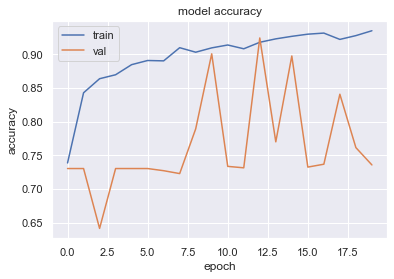

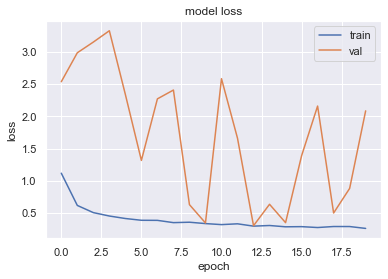

In [71]:
# Accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

# Loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [72]:
####7th

weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=[256,256,3]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
###0.5
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
###0.5+  5layer
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
###0.5
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
###0.5
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
###0.5
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(3, activation='softmax'))
 
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 activation_60 (Activation)  (None, 256, 256, 32)      0         
                                                                 
 batch_normalization_60 (Bat  (None, 256, 256, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_61 (Conv2D)          (None, 256, 256, 32)      9248      
                                                                 
 activation_61 (Activation)  (None, 256, 256, 32)      0         
                                                                 
 batch_normalization_61 (Bat  (None, 256, 256, 32)     128       
 chNormalization)                                     

Total params: 1,029,667
Trainable params: 1,027,491
Non-trainable params: 2,176
_________________________________________________________________


In [73]:
Callback =  myCallback()


opt = tf.keras.optimizers.Adam(learning_rate=0.0003)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history3 = model.fit(train_datagen, steps_per_epoch = 3740/32, epochs =20,validation_data = valid_datagen, validation_steps = 935/32, callbacks = Callback
)

Epoch 1/20
116/116 [==============================] - 1918s 16s/step - loss: 1.3479 - accuracy: 0.6291 - val_loss: 1.5387 - val_accuracy: 0.7305
Epoch 2/20
116/116 [==============================] - 1895s 16s/step - loss: 0.6296 - accuracy: 0.8136 - val_loss: 2.3759 - val_accuracy: 0.7305
Epoch 3/20
116/116 [==============================] - 1885s 16s/step - loss: 0.5111 - accuracy: 0.8471 - val_loss: 2.5343 - val_accuracy: 0.7305
Epoch 4/20
116/116 [==============================] - 1870s 16s/step - loss: 0.4942 - accuracy: 0.8583 - val_loss: 2.2066 - val_accuracy: 0.7305
Epoch 5/20
116/116 [==============================] - 1783s 15s/step - loss: 0.4568 - accuracy: 0.8735 - val_loss: 1.9012 - val_accuracy: 0.7305
Epoch 6/20
116/116 [==============================] - 1769s 15s/step - loss: 0.4448 - accuracy: 0.8751 - val_loss: 2.4954 - val_accuracy: 0.7305
Epoch 7/20
116/116 [==============================] - 27305s 236s/step - loss: 0.4407 - accuracy: 0.8848 - val_loss: 1.8368 - val_

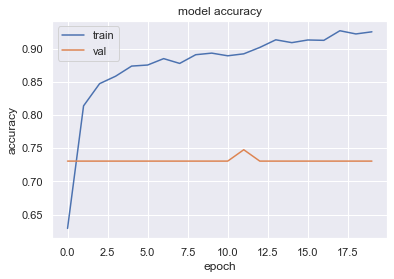

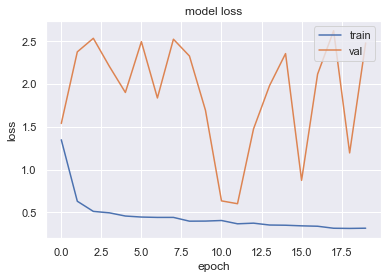

In [75]:
# Accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

# Loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [80]:
##############8th

weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=[256,256,3]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
###0.5
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
###0.5+ 
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
###0.6#########
model.add(Dropout(0.6))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
###0.6 ######
model.add(Dropout(0.6))


model.add(Flatten())
model.add(Dense(3, activation='softmax'))
 
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_118 (Conv2D)         (None, 256, 256, 32)      896       
                                                                 
 activation_118 (Activation)  (None, 256, 256, 32)     0         
                                                                 
 batch_normalization_118 (Ba  (None, 256, 256, 32)     128       
 tchNormalization)                                               
                                                                 
 conv2d_119 (Conv2D)         (None, 256, 256, 32)      9248      
                                                                 
 activation_119 (Activation)  (None, 256, 256, 32)     0         
                                                                 
 batch_normalization_119 (Ba  (None, 256, 256, 32)     128       
 tchNormalization)                                   

In [81]:
Callback =  myCallback()


opt = tf.keras.optimizers.Adam(learning_rate=0.0003)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history4 = model.fit(train_datagen, steps_per_epoch = 3740/32, epochs =20,validation_data = valid_datagen, validation_steps = 935/32, callbacks = Callback
)

Epoch 1/20
116/116 [==============================] - 2319s 20s/step - loss: 1.2649 - accuracy: 0.7037 - val_loss: 2.1793 - val_accuracy: 0.7305
Epoch 2/20
116/116 [==============================] - 2122s 18s/step - loss: 0.6717 - accuracy: 0.8249 - val_loss: 2.8734 - val_accuracy: 0.7305
Epoch 3/20
116/116 [==============================] - 2081s 18s/step - loss: 0.5511 - accuracy: 0.8580 - val_loss: 3.4033 - val_accuracy: 0.3690
Epoch 4/20
116/116 [==============================] - 2084s 18s/step - loss: 0.4928 - accuracy: 0.8682 - val_loss: 3.0695 - val_accuracy: 0.7305
Epoch 5/20
116/116 [==============================] - 2115s 18s/step - loss: 0.4660 - accuracy: 0.8733 - val_loss: 2.0724 - val_accuracy: 0.7294
Epoch 6/20
116/116 [==============================] - 4306s 37s/step - loss: 0.4242 - accuracy: 0.8781 - val_loss: 1.4342 - val_accuracy: 0.7305
Epoch 7/20
116/116 [==============================] - 33106s 286s/step - loss: 0.4077 - accuracy: 0.8869 - val_loss: 1.3084 - val_

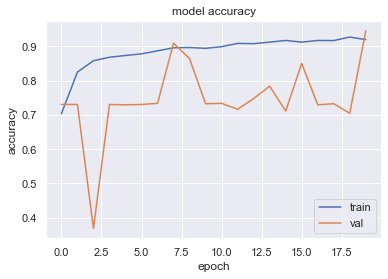

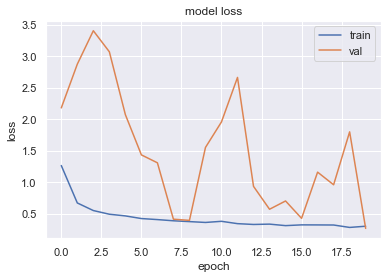

In [83]:
# Accuracy
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

# Loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()